## Modulos, bibliotecas e inicializações

In [2]:
import pandas as pd
import sweetviz as sv
import sklearn
from icecream import ic
import matplotlib.pyplot as plt
import seaborn as sns
import dtale as dt
import numpy as np
import warnings
from scipy import signal
import os.path

In [3]:
np.VisibleDeprecationWarning = DeprecationWarning

In [4]:
data_dir = os.path.join('.','aurorabp-sample-data-main/sample')

In [5]:
participants_df = pd.read_csv(os.path.join(data_dir, 'participants.tsv'), sep='\t')
features_df = pd.read_csv(os.path.join(data_dir, 'features.tsv'), sep='\t')
oscillometric_df = pd.read_csv(os.path.join(data_dir, 'measurements_oscillometric.tsv'), sep='\t')
auscultatory_df = pd.read_csv(os.path.join(data_dir, 'measurements_auscultatory.tsv'), sep='\t')

### Separando faixa de dados:

In [6]:

pid_count = 3
osci_count = 2
sampling_rate = 100
ppt_osci_df = oscillometric_df.loc[oscillometric_df.pid == participants_df.pid[pid_count]]
## carregar dataset do waveform
osci_series = ppt_osci_df.iloc[osci_count]

In [7]:
osci_series

pid                                                                 o003
phase                                                            initial
measurement                                               Sitting arm up
date_time                                            2018-01-01 09:34:48
sbp                                                                136.0
dbp                                                                 91.0
duration                                                            30.0
pressure_quality                                                   0.845
optical_quality                                                     0.88
waveform_file_path     measurements_oscillometric/o003/o003.initial.S...
waveforms_generated                                                    1
Name: 145, dtype: object

In [8]:
waveform_df = pd.read_csv(os.path.join(data_dir, osci_series.waveform_file_path), delimiter = '\t')

In [9]:
t = waveform_df['t']
ekg = waveform_df['ekg']
optical = waveform_df['optical']
pressure = waveform_df['pressure']
accelX = waveform_df['accel_x']
accelY = waveform_df['accel_y']
accelZ = waveform_df['accel_z']

### Análise visual 

In [10]:
def extremos_na_faixa(df, feature, tempo_col='t', inicio=0, fim=0):
 
    faixa_df = df[(df[tempo_col] >= inicio) & (df[tempo_col] <= fim)]

    max_linha = faixa_df.loc[faixa_df[feature].idxmax()]
    min_linha = faixa_df.loc[faixa_df[feature].idxmin()]

    print(f"Maximo de {feature}: {max_linha[feature]} em t = {max_linha[tempo_col]}")
    print(f"Minimo de {feature}: {min_linha[feature]} em t = {min_linha[tempo_col]}")
    
    return max_linha, min_linha


#### EKG

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(25, 10))
axs.plot(t, ekg)

axs.set_xlim(0, 0.4)
axs.set_ylim(126.03, 127.5)
axs.set_yticks(np.arange(126.03, 127.5, 0.105));
axs.set_xticks(np.arange(0.00, 0.40, 0.01));

#adicionando grades
axs.minorticks_on()
axs.grid(True, which='major' , color='black', linestyle=':', linewidth=0.5, axis='both')         

axs.set_xlabel("TIME")
axs.set_ylabel("EKG")



In [ ]:
max_linha, min_linha = extremos_na_faixa(waveform_df, 'ekg', inicio=0.0, fim=0.4)


#### PRESSURE

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(25, 10))
axs.plot(t, pressure)

axs.set_xlim(0,7.1)
axs.set_ylim(2900, 3050)
axs.set_yticks(np.arange(2900, 3050, 10));
axs.set_xticks(np.arange(0.00, 7.1, 0.1));

#adicionando grades
axs.minorticks_on()
axs.grid(True, which='major' , color='black', linestyle=':', linewidth=0.6, axis='both')         

axs.set_xlabel("TIME")
axs.set_ylabel("PRESSURE")

In [ ]:
max_linha, min_linha = extremos_na_faixa(waveform_df, 'pressure', inicio=0.0, fim=7.1)

#### PPG / OPTICAL

Text(0, 0.5, 'OPTICAL')

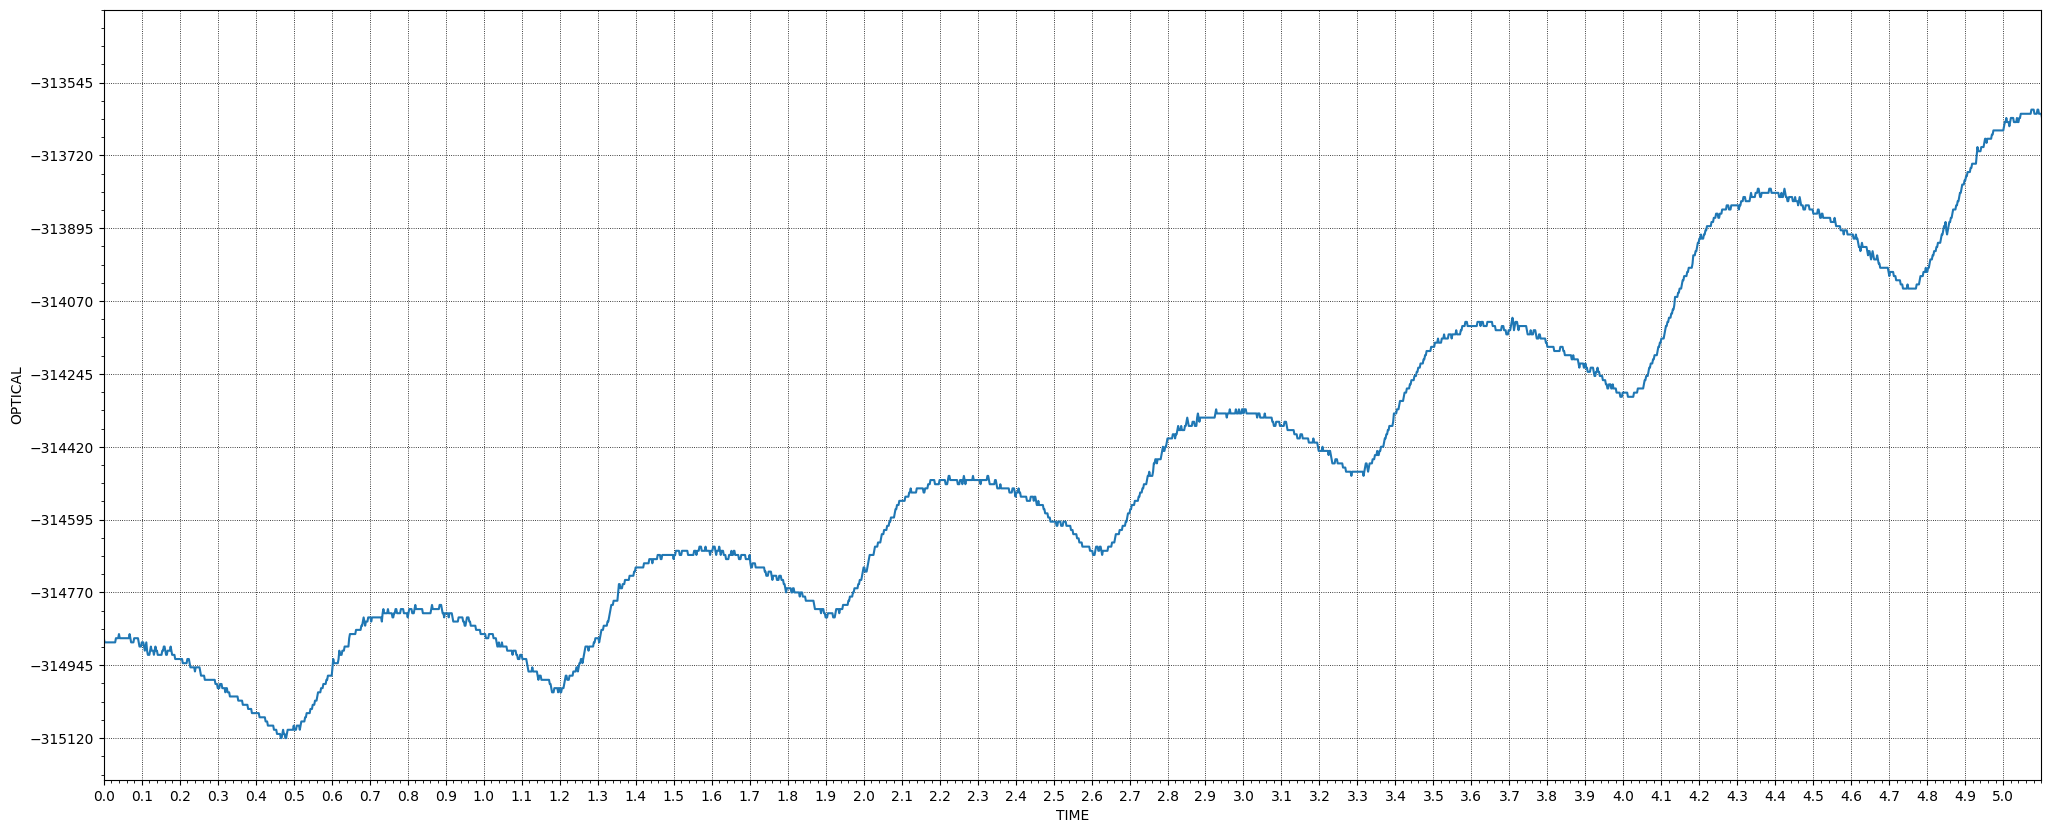

In [36]:
fig, axs = plt.subplots(1,1, figsize=(25, 10))
axs.plot(t, optical)
axs.set_xlim(0, 5.1)
axs.set_ylim(optical.min() - 100 , -313370)
axs.set_yticks(np.arange(optical.min(), -313370, 175));
axs.set_xticks(np.arange(0.00, 5.01, 0.1));

#adicionando grades
axs.minorticks_on()
axs.grid(True, which='major' , color='black', linestyle=':', linewidth=0.6, axis='both')         

axs.set_xlabel("TIME")
axs.set_ylabel("OPTICAL")

In [37]:
max_linha, min_linha = extremos_na_faixa(waveform_df, 'optical', inicio=0.0, fim=5.1)

Maximo de optical: -313610.0 em t = 5.074
Minimo de optical: -315120.0 em t = 0.466


#### ACELERAÇÃO DOS EIXOS NA TONOMETRIA

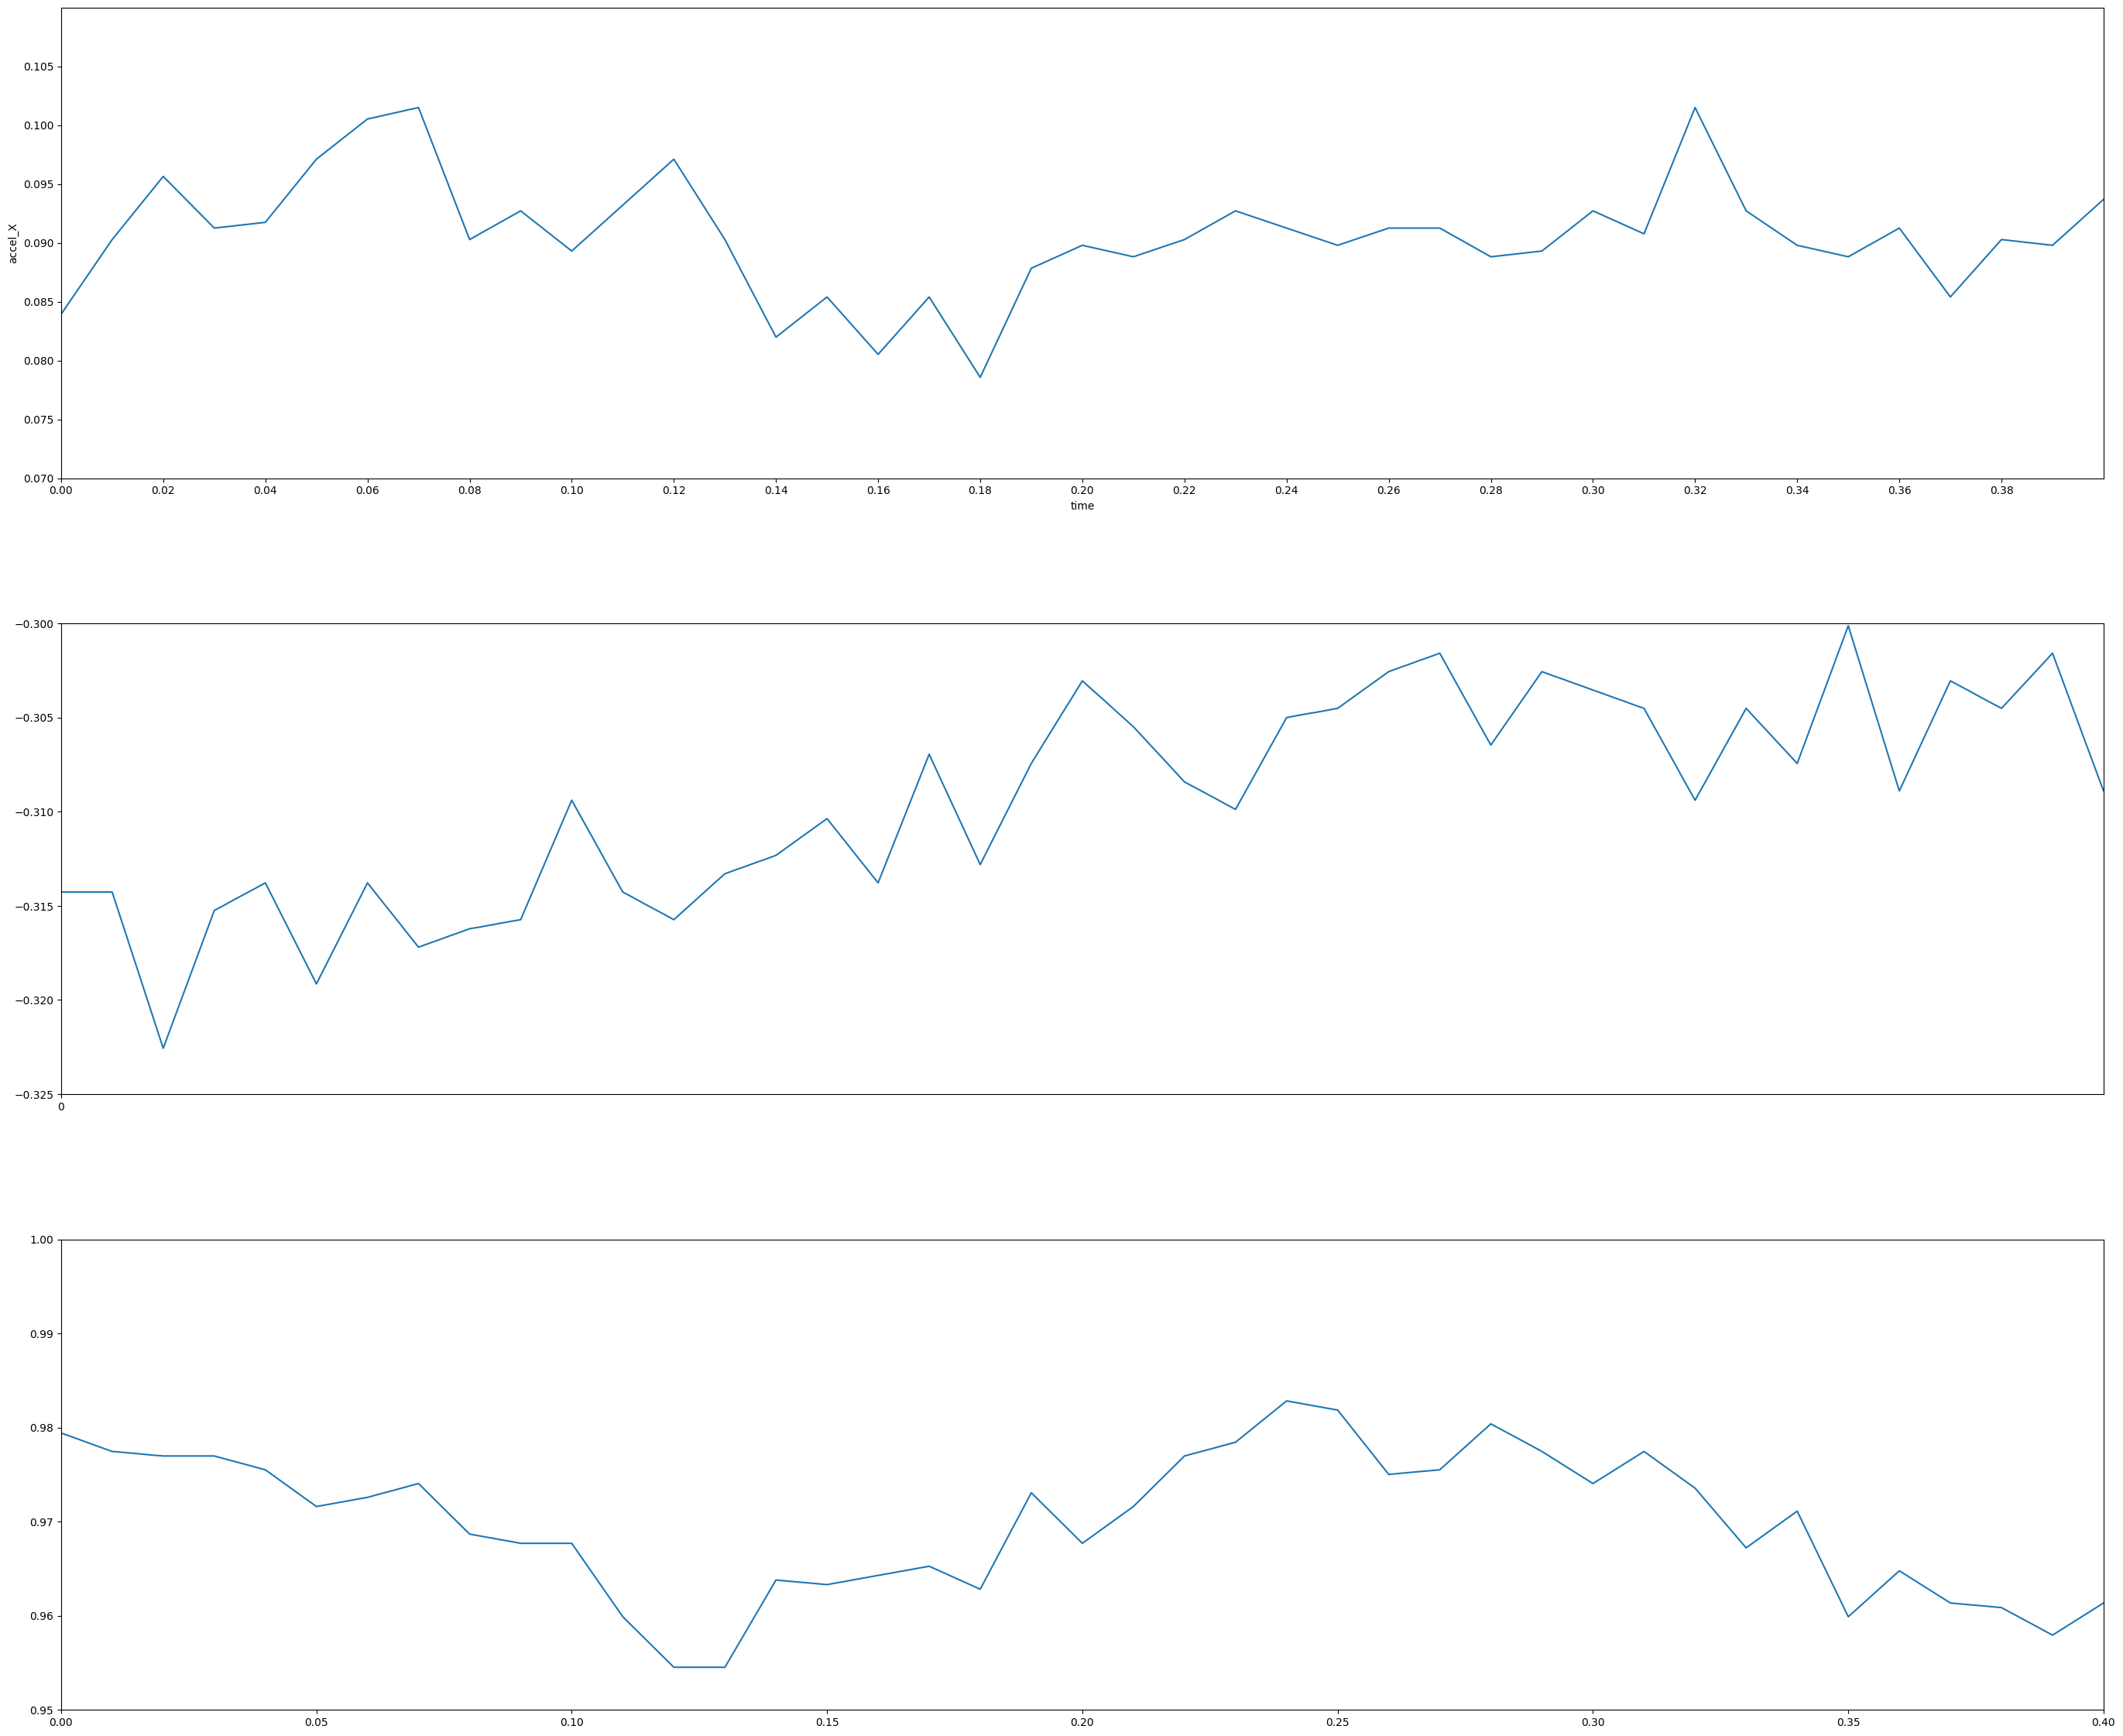

In [38]:
fig, axs = plt.subplots(3,1, figsize=(30, 25))

axs[0].plot(t, accelX)
axs[0].set_xlim(0, 0.4)
axs[0].set_ylim(0.07 , 0.11)
axs[0].set_xlabel("time")
axs[0].set_ylabel('accel_X')
axs[0].set_xticks(np.arange(0.00, 0.40, 0.02))
axs[0].set_yticks(np.arange(0.070, 0.110, 0.005))

axs[1].plot(t, accelY)
axs[1].set_xlim(0, 0.4)
axs[1].set_ylim(-0.325 , -0.30)
axs[1].set_xticks(np.arange(0.00, 0.40, 0.5))

axs[2].plot(t, accelZ)
axs[2].set_xlim(0, 0.4)
axs[2].set_ylim(0.950, 1)

plt.tight_layout(pad=10)

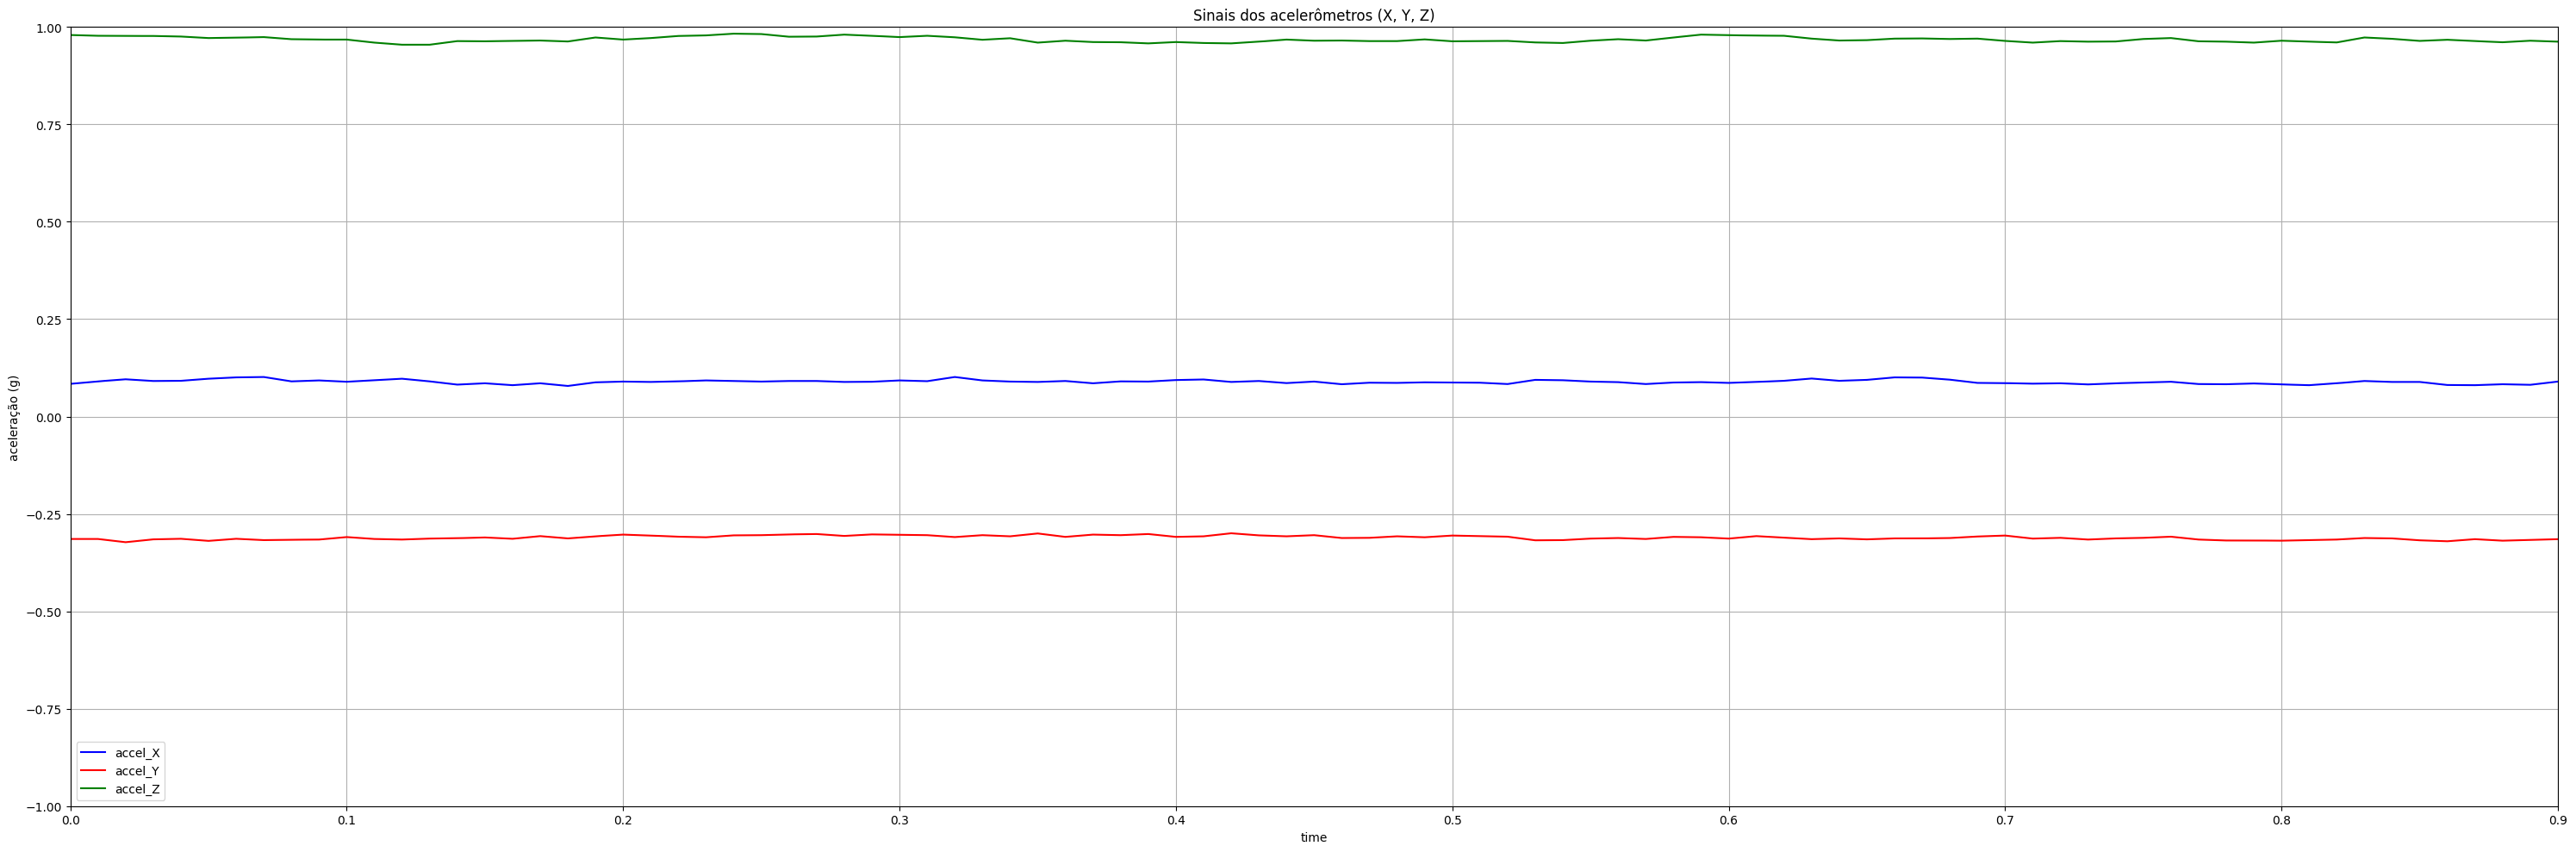

In [46]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(30, 10))

ax.plot(t, accelX, label='accel_X', color='blue')
ax.plot(t, accelY, label='accel_Y', color='red')
ax.plot(t, accelZ, label='accel_Z', color='green')

ax.set_xlim(0, 0.05)
ax.set_ylim(-1, 1)
ax.set_xticks(np.arange(0.00, 1, 0.1))

ax.set_xlabel("time")
ax.set_ylabel("aceleração (g)")
ax.set_title("Sinais dos acelerômetros (X, Y, Z)")

# Grid e legenda
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
# terminar os graficos dos eixos
# ajustar os graficos para terem o mesmo tempo
# adicionar explicação conceitual
# fazer grafico ekg + ppg + pressure
    # estudar relação de ppg com pressure
    # correlacionar ppg com ekg